In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import Dependencies
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files/paths to load
city_data_toload = "Resources/city_data.csv"
ride_data_toload = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a Pandas DataFrame
city_data_df = pd.read_csv(city_data_toload)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_toload)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Inspect data for missing, malformed, or incorrect data

In [6]:
# For the city_data_df:

    # Get all the rows that contain null values.
city_data_df.count()
city_data_df.isnull().sum()
    # Make sure the driver_count column has an integer data type.
city_data_df.dtypes
    # Find out how many data points there are for each type of city.
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [7]:
# or get count data points for each city
#Urban,Suburban,Rural
sum(city_data_df["type"] == "Urban")

66

In [8]:
# For the ride_data_df DataFrame, we need to:

    # Get all the rows that contain null values.
ride_data_df.count()
ride_data_df.isnull().sum()
    # Make sure the fare and ride_id columns are numerical data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [9]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

# Inner join would have worked too

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
total_ride_count = pyber_data_df.count()

In [11]:
# For the bubble chart, plot the following:

# The average fare for each type of city on the y-axis
# The total number of rides for each type of city on the x-axis
# Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city

# To get the average fare, use the Pandas mean() method for each city in the "fare" column.
# To get the total number of rides for each city, use the Pandas count() method for each city in the "ride_id" column.
# To make the bubble size correlate to the number of drivers for each city, get the average driver_count for each city.
# Create three separate DataFrames for each type and then create Data Series for each step.

# Each new DataFrame can be created by filtering the pyber_data_df DataFrame where the city type is equal to Urban, Suburban, or Rural.

In [12]:
# Create the Urban, Suburban, and Rural city DataFrames
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [13]:
# Get the ride count (total rides) for each city of each type
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]

In [14]:
# ONE of the three datasets needed to create a bubble chart

In [15]:
# Get average fare for each city of each type:  Urban, Suburban, Rural
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [16]:
# TWO of three datasets needed to create a bubble chart

In [17]:
# Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby("city").mean()["driver_count"]

# also found in city_data.csv file but not grouped by type

# Next, suburban and rural
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby("city").mean()["driver_count"]

In [18]:
# ALL datasets needed and can begin to create our bubble chart

In [19]:
# Create a scatter plot for each type of city where the following conditions are met:

# The x-axis is the number of rides for each city.
# The y-axis is the average fare for each city.
# The size of each marker is the average number of drivers in each city.

# Individually, and add them all to one chart using MATLAB method

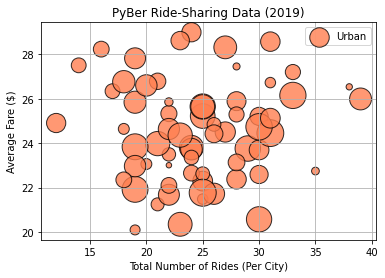

In [20]:
# Urban first: x_axis = urban_ride_count, y_axis = urban_avg_fare
plt.scatter(urban_ride_count, urban_avg_fare,
            s=10*urban_driver_count,
           c='coral',
           edgecolor='black',
           linewidths=1,
           alpha=0.8,
           label='Urban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

In [21]:
# Backtrack and add title, axes labels, legend, and change color/size of markers    

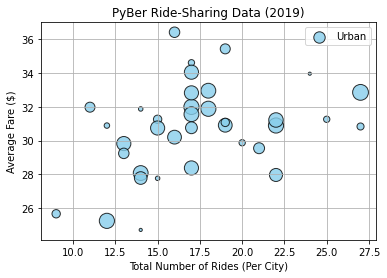

In [22]:
# Suburban Bubble Chart
plt.scatter(suburban_ride_count, suburban_avg_fare,
            s=10*suburban_driver_count,
           c='skyblue',
           edgecolor='black',
           linewidths=1,
           alpha=0.8,
           label='Urban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

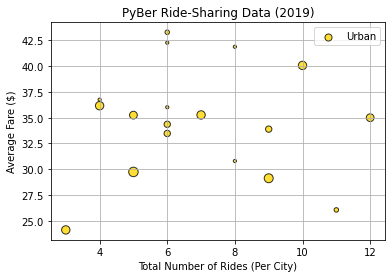

In [23]:
# Rural Chart
plt.scatter(rural_ride_count, rural_avg_fare,
            s=10*rural_driver_count,
           c='gold',
           edgecolor='black',
           linewidths=1,
           alpha=0.8,
           label='Urban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

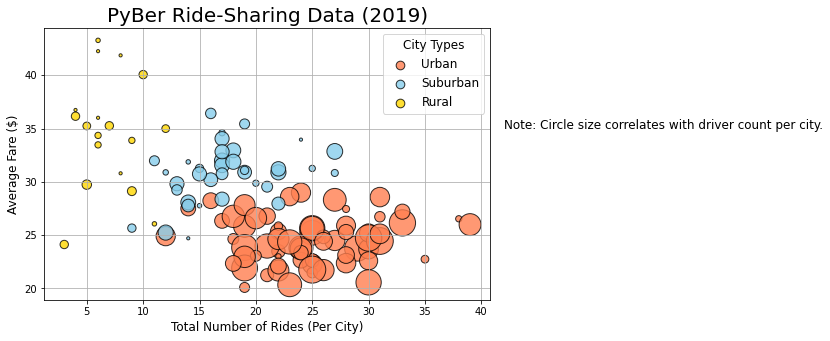

In [24]:
# Combine and run all in one cell:
plt.subplots(figsize=(8,5))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Add a title, labels for the axes, a legend, and a grid for all three charts and increase the font size
# of the axes labels to 12 and the title to 20.  Enlarge the figure

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

# plt.legend() returns legend with varying sizes for city types
# Customize the legend to scale them to the same size.
# Declare a variable for the legend function, lgnd = plt.legend(), and add parameters for font size, legend location, 
    # and legend title, along with some other features
# Then, use legendHandles[]._sizes to set the font size of the marker in the legend to a fixed size.
# Create legend:
lgnd = plt.legend(fontsize='12', mode='Expanded',
        scatterpoints=1, loc='best', title='City Types')

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Create a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure -provide a direct path to the folder and filename of saved image
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [25]:
# STATISTICS -summary and central tendency

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [26]:
#summary
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [27]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [28]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [29]:
# Calculate the MEAN of the ride count for each city type -using pandas mean() and separate w/ commas for one line
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [30]:
# MEDIAN
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [31]:
# MODE
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [32]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [33]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [34]:
# MOD for suburban and rural
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [35]:
# SUMMARY stats for average fares for each city type

In [36]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [37]:
# calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [38]:
# Get the fares for suburban and rural cities
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [39]:
#Central Tendencey for suburban and rural
mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)

mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_suburban_fares = sts.mode(suburban_fares)

mean_urban_fares, mean_suburban_fares, mean_rural_fares

(24.52577230769236, 30.97012800000002, 34.623440000000016)

In [40]:
# SUMMARY stats for Drivers by City Type

In [41]:
# Get the driver count data from the all city types
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [42]:
# Central Tendency for all city types
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

In [43]:
# Show outliers for presentatioin using box-and-whisker plots
#ax.boxplot()

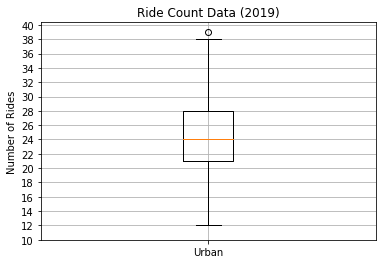

In [44]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

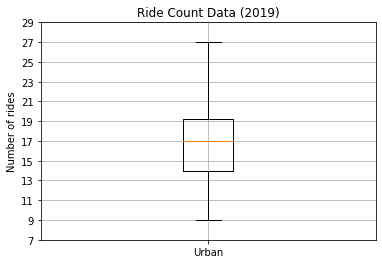

In [45]:
# BOX-AND-WHISKER for Suburban
x_labes = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(7, 30, step=2.0))
ax.grid()

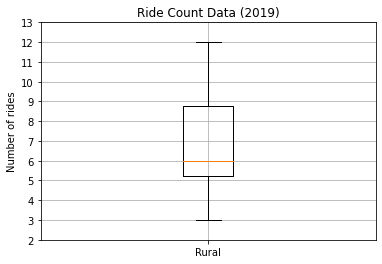

In [46]:
# RURAL
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(2, 14, step=1.0))
ax.grid()

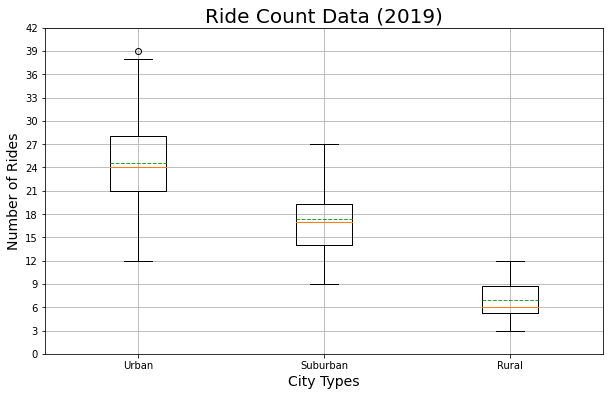

In [47]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels, showmeans=True, meanline=True)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [48]:
# Get all the "True" values where the urban_ride_count equals 39.
# Then, filter the urban_ride_count Series for all the "True" values and get the city name from the index

In [49]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count and is the outlier of urban city ride count data.")

West Angela has the highest rider count and is the outlier of urban city ride count data.


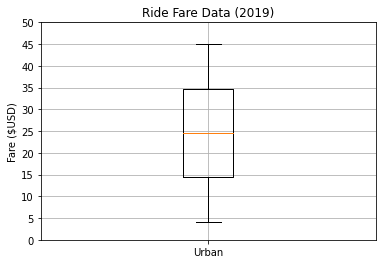

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [50]:
# Create a box-and-whisker plot for the URBAN FARE data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add title, y-axis label, y_ticks, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

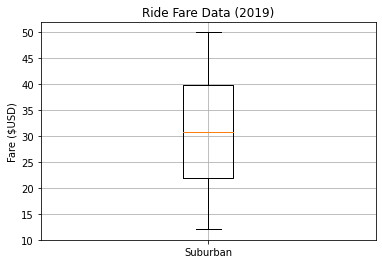

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [51]:
# SUBURBAN FARE box-and-whisker
x_labels = ["Suburban"]
fig,ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(10, 55, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

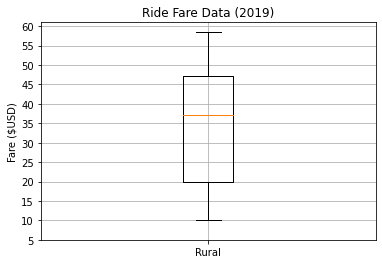

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [52]:
# RURAL FARE box-and-whisker
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(5, 65, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

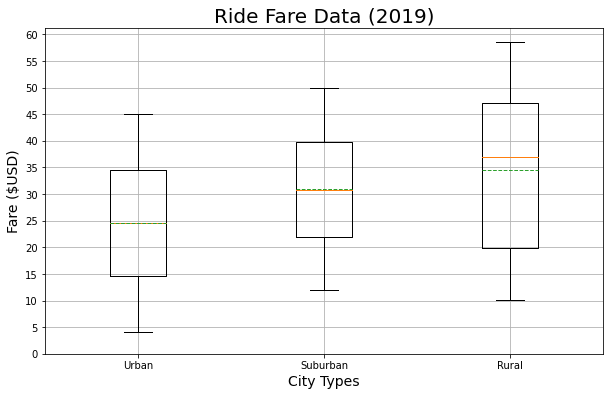

<Figure size 432x288 with 0 Axes>

In [53]:
# ALL (3) CITY TYPE FARE data box-and-whisker
x_labels = ["Urban", "Suburban", "Rural"]
all_fares = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(all_fares, labels=x_labels, showmeans=True, meanline=True)

ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
plt.show()

plt.savefig("analysis/Fig3.png")

In [54]:
# There disparity between median Fare prices for rural and the other two city types is likely due to:

# 1. Longer distances traveled which would result in longer times for driver arrival and trip duration
# 2. 3.5-4.5 times fewer ride counts (from Fig2.png) which would result in costlier rides
    # due to incentive for drivers to occupy the rural areas.

In [55]:
# DRIVER count data BOX-AND-WHISKERS

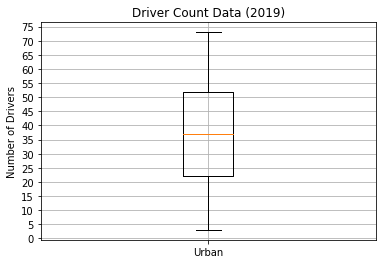

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [56]:
# Create the box-and-whisker plot for the urban driver count data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

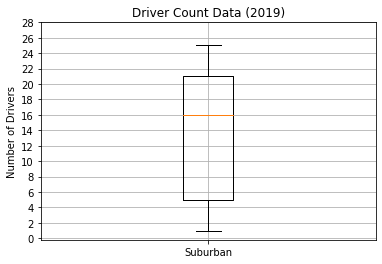

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [57]:
# Suburban Drivers
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

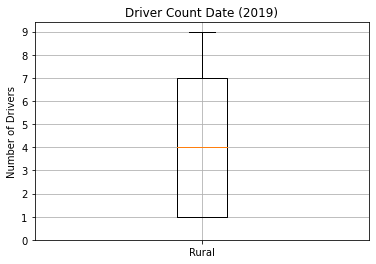

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [58]:
# Rural Drivers
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

ax.set_title("Driver Count Date (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 10, step=1.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

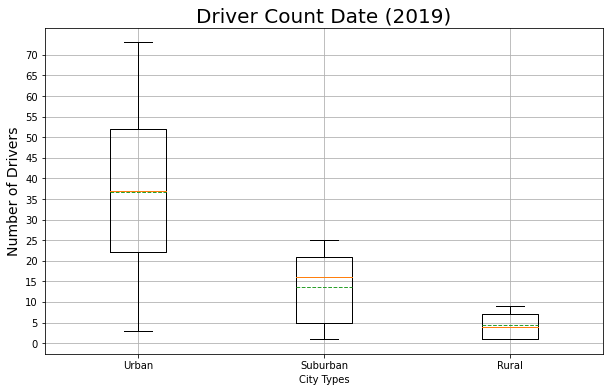

In [59]:
# ALL (3) DRIVERS data box-and-whisker
x_labels = ["Urban", "Suburban", "Rural"]
all_drivers = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(all_drivers, labels=x_labels, showmeans=True, meanline=True)

ax.set_title("Driver Count Date (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types")
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()

plt.savefig("analysis/Fig4.png")
plt.show()

In [60]:
# Median # of drivers in rural cities is 4-9 times less than suburban and urban cities, respectively.
# Also, by looking at driver count data, we can form conjectures about overall revenue by city types

In [61]:
# Next, Percentage of Overall Fares for each type of city
# alternative vizes

In [62]:
# To create this pie chart:

    # Get the total fares for each city type.
    # Get the total for all the fares for all the city types.
    # Calculate the percentage of the total fares for each city type.

In [63]:
# Sum of Fares for each city Type
sum_fares_by_type = pyber_data_df.groupby("type").sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [64]:
# Sum of All the Fares
total_fares = pyber_data_df.sum()["fare"]
#or total_fares = pyber_data_df.["fare"].sum()
total_fares

63538.64

In [65]:
# Calc the % of fare for each city type
type_percents = 100*sum_fares_by_type/total_fares
type_percents

# or one line of code:
# type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

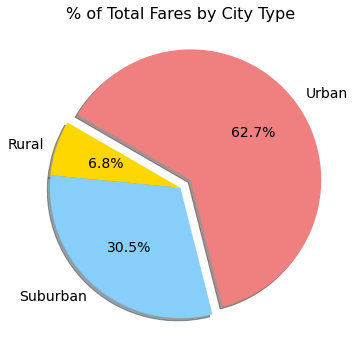

In [73]:
# PIE CHART for % of fare by type:
plt.figure(figsize=(10, 6))
#plt.subplots(figsize=(10, 6)) works too

#need an array containing values and array for labels
plt.pie(type_percents,
       labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
       autopct='%1.1f%%',
        shadow=True,
       startangle=150)
plt.title("% of Total Fares by City Type", fontsize=16)
# Change default font size from 10 to 14
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
plt.show()

In [74]:
# PIE CHART -Ride Count percentages %

In [80]:
# Get the total number of rides for each city type.
# Get the total rides for all the city types.
# Calculate the percentage of the total rides for each city type.
ride_percents = pyber_data_df.groupby("type").count()["ride_id"] / pyber_data_df["ride_id"].count() * 100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

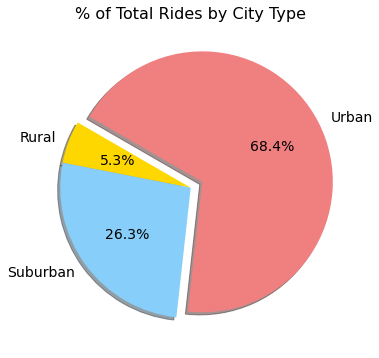

In [81]:
plt.figure(figsize=(10, 6))
#plt.subplots(figsize=(10, 6)) works too

#need an array containing values and array for labels
plt.pie(ride_percents,
       labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
       autopct='%1.1f%%',
        shadow=True,
       startangle=150)
plt.title("% of Total Rides by City Type", fontsize=16)
# Change default font size from 10 to 14
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
plt.show()

In [82]:
# PIE CHART -Total Drivers percentage %

    # Get the total number of drivers for each city type.
    # Get the total drivers for all the city types.
    # Calculate the percentage of the total drivers for each city type.

In [86]:
drivers_percent = city_data_df.groupby("type").sum()["driver_count"] / city_data_df["driver_count"].sum() * 100
drivers_percent

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64